In [26]:
import json
import requests
import urllib.request
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import fiona
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from shapely.geometry import Point
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

In [3]:
response = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&orderby=time&limit=7000')

In [4]:
print(response.status_code)

200


In [5]:
live_eq = response.content

live_eq

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
## API site: https://earthquake.usgs.gov/fdsnws/event/1/#format-geojson

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&orderby=time&limit=7000'
request = requests.get(url)
b = bytes(request.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gdf = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gdf.head(20))

   alert  cdi      code                                             detail  \
0         0.0  72937526  https://earthquake.usgs.gov/fdsnws/event/1/que...   
1         0.0  17555187  https://earthquake.usgs.gov/fdsnws/event/1/que...   
2         0.0  17555184  https://earthquake.usgs.gov/fdsnws/event/1/que...   
3         0.0  72937521  https://earthquake.usgs.gov/fdsnws/event/1/que...   
4         0.0  17555181  https://earthquake.usgs.gov/fdsnws/event/1/que...   
5         0.0  17555173  https://earthquake.usgs.gov/fdsnws/event/1/que...   
6         0.0  37826127  https://earthquake.usgs.gov/fdsnws/event/1/que...   
7         0.0  37826111  https://earthquake.usgs.gov/fdsnws/event/1/que...   
8         0.0  17553802  https://earthquake.usgs.gov/fdsnws/event/1/que...   
9         0.0  72937486  https://earthquake.usgs.gov/fdsnws/event/1/que...   
10        0.0  72937481  https://earthquake.usgs.gov/fdsnws/event/1/que...   
11        0.0  37826103  https://earthquake.usgs.gov/fdsnws/even

In [50]:
eq_df = gdf
eq_df.to_csv('/Users/Justin/Code/data-question-3-xtreme-united/eq_api_return.csv')

In [55]:
eq_df.mag

0       1.93
1       1.20
2       1.80
3       1.65
4       1.70
5       2.40
6       0.72
7       0.28
8       1.20
9       0.86
10      0.79
11      0.57
12      1.90
13      1.12
14      0.32
15      1.06
16      0.62
17      0.69
18      4.60
19      1.46
20      1.10
21      0.44
22      0.40
23      2.12
24      1.70
25      1.40
26      1.70
27      1.40
28      0.56
29      0.53
        ... 
6970    2.43
6971    0.75
6972    1.07
6973    0.59
6974    1.20
6975    1.00
6976    1.77
6977    1.60
6978    2.20
6979    2.70
6980    0.68
6981    0.58
6982    0.10
6983    0.97
6984    5.40
6985    1.12
6986    0.66
6987    5.20
6988    0.33
6989    1.44
6990    3.01
6991    2.07
6992    1.10
6993    3.11
6994    0.50
6995    1.25
6996    1.80
6997    0.43
6998    1.60
6999    2.07
Name: mag, Length: 7000, dtype: float64

In [51]:
# pylab.rcParams['figure.figsize'] = 25, 25

# eq_df.plot()
# plt.show()

In [52]:
world = gpd.GeoDataFrame.from_file('/Users/Justin/Code/data-question-3-xtreme-united/world.shp')

In [53]:
def mag_slider(x):
    for row in eq_df['mag']:
        eq_bool = x < eq_df['mag']
        eq_table = eq_df[eq_bool==True]
        pylab.rcParams['figure.figsize'] = 50, 50
        base = world.plot(color='black', edgecolor='grey')
        eq_table.plot(ax=base, marker='o', alpha = 0.3, column ='mag', cmap = 'autumn', markersize=7);
        return plt.show()

In [54]:
mag = widgets.FloatSlider(
    value=7.0,
    min=0,
    max=10.0,
    step=0.1,
    description='Magnitude',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

## interact(function name, function input = slider)

widgets.interact(mag_slider, x=mag)
# pylab.rcParams['figure.figsize'] = 50, 50
# base = world.plot(color='black', edgecolor='grey')
# eq_table.plot(ax=base, marker='o', alpha = 0.3, column ='mag', cmap = 'autumn', markersize=7);

A Jupyter Widget

<function __main__.mag_slider>

In [ ]:
pylab.rcParams['figure.figsize'] = 50, 50
base = world.plot(color='black', edgecolor='grey')
eq_df.plot(ax=base, marker='o', alpha = 0.3, column ='mag', cmap = 'autumn', markersize=7);

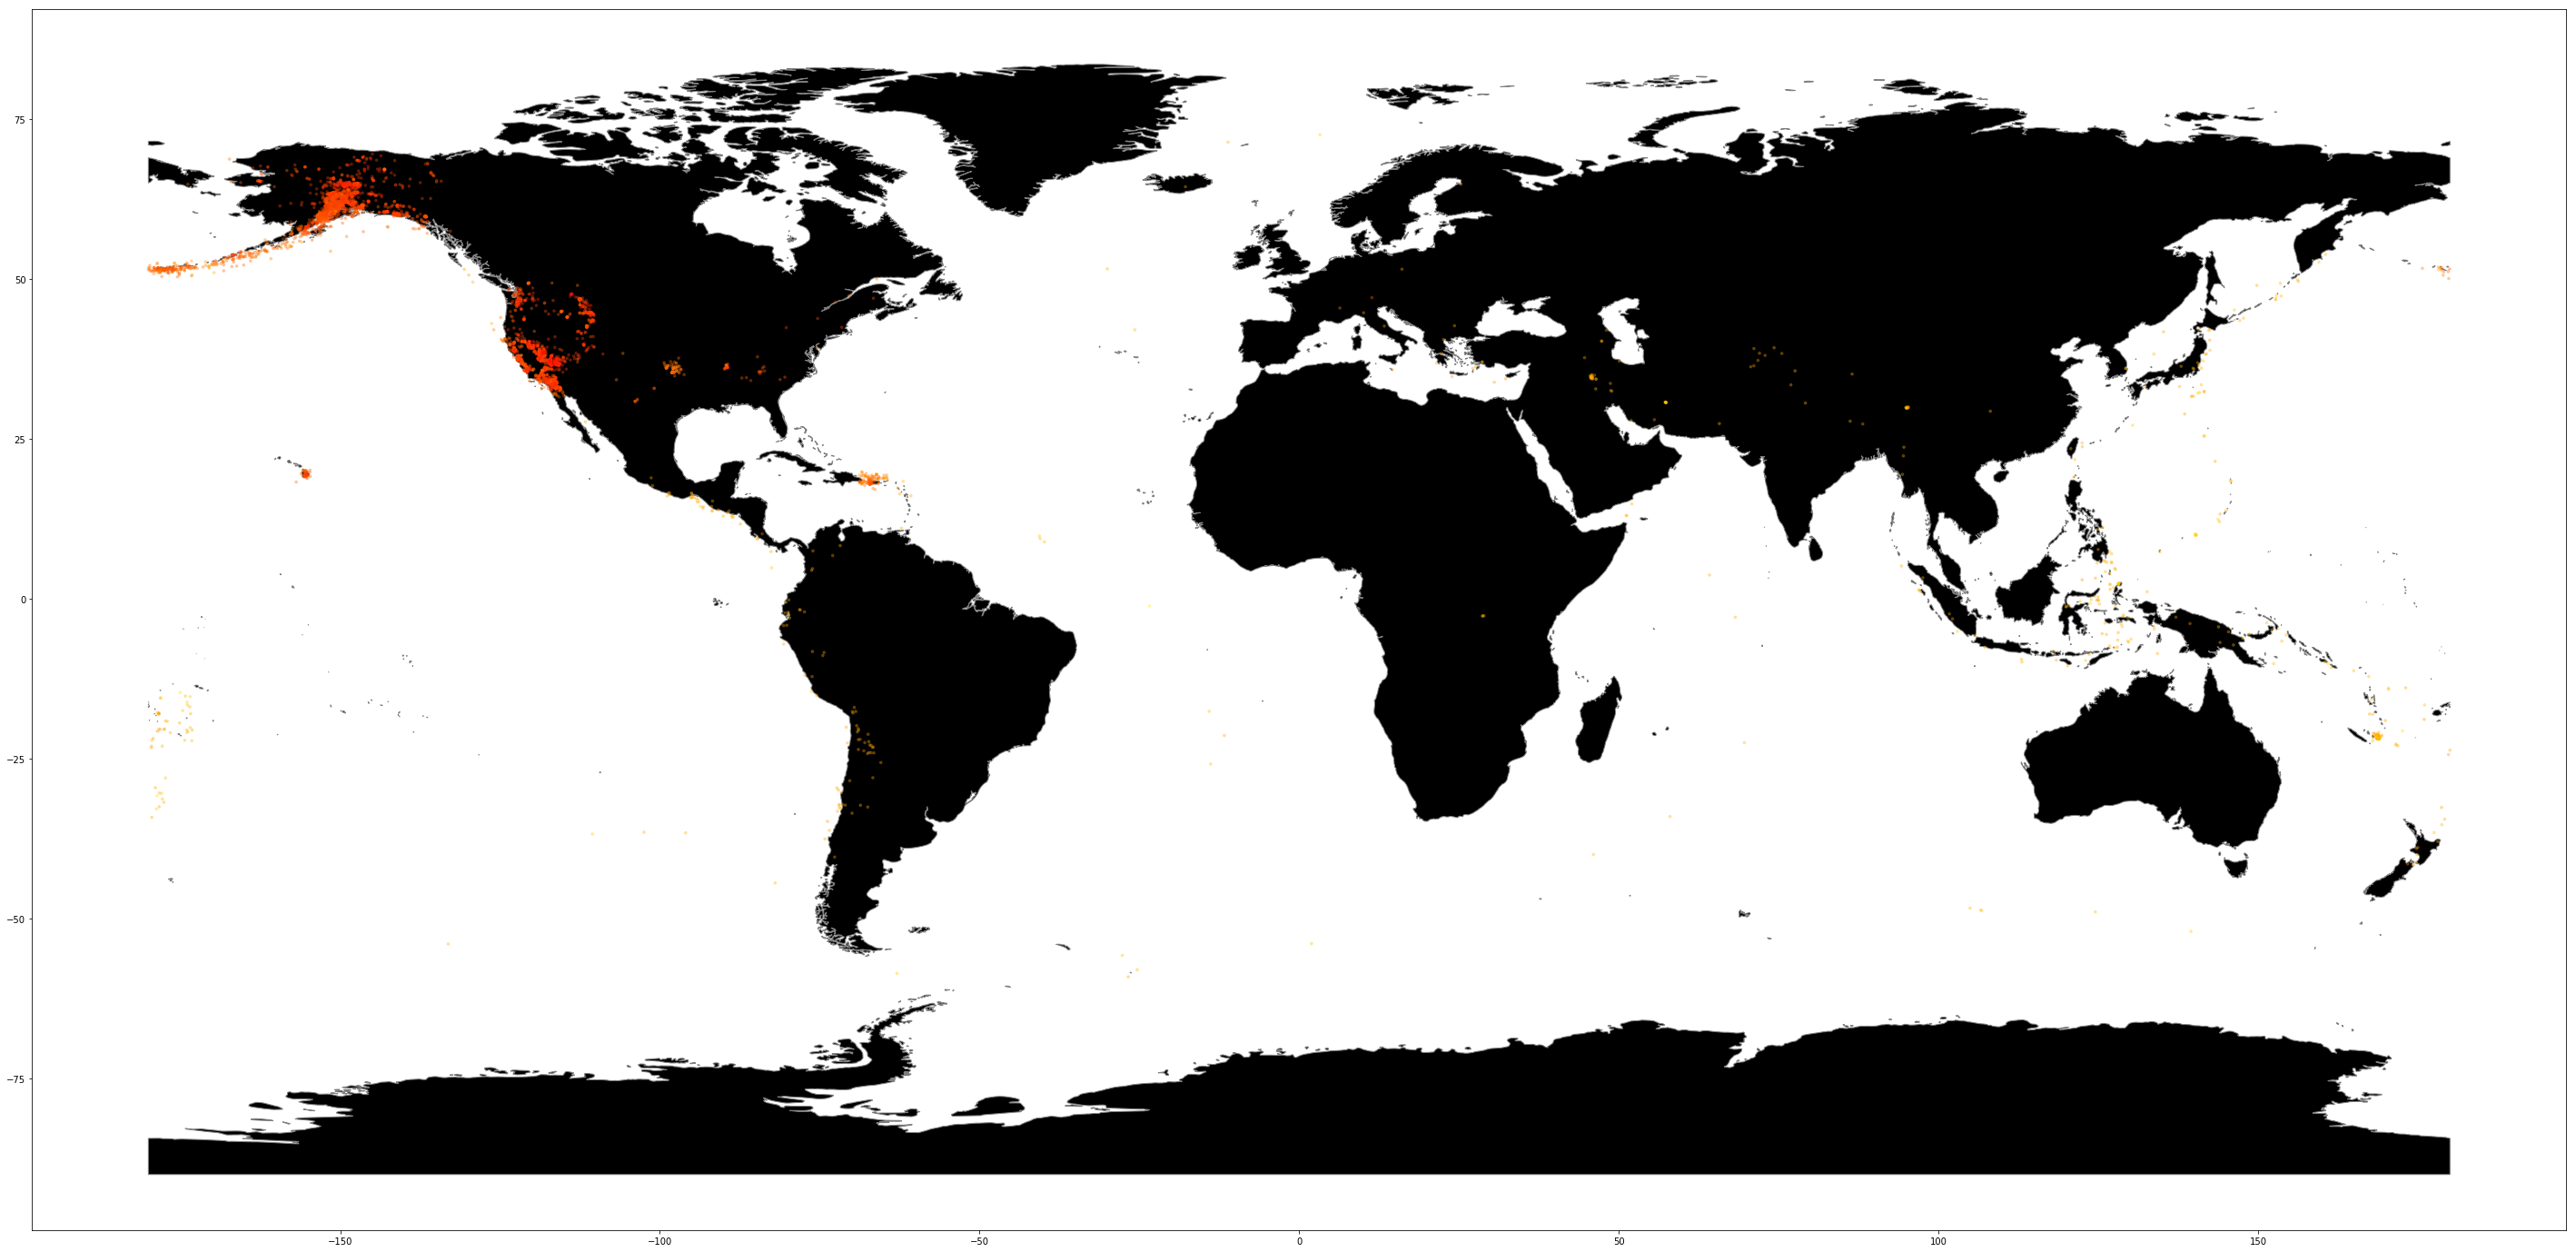

In [18]:
plt.show()

In [ ]:
top_eq = pd.DataFrame.from_csv('/Users/Justin/Code/data-question-3-xtreme-united/eq_df.csv')

In [ ]:
top_eq.head()

In [ ]:
geometry = [Point(xy) for xy in zip(top_eq.long, top_eq.lat)]
hist_eq_df = top_eq.drop(['long', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(hist_eq_df, crs=crs, geometry=geometry)

In [ ]:
hist_eq_df.head()

In [ ]:
pylab.rcParams['figure.figsize'] = 25, 25
base = world.plot(color='black', edgecolor='grey')

eq_df.plot(ax=base, marker='o', column ='mag', cmap = 'autumn', markersize = 7);
# hist_eq_df.plot(ax=base, marker='*', color = 'blue', markersize = 10);
ax.set_axis_off()
f.suptitle('Last 1000 earthquakes with magnitude > 6')

plot.show()

In [ ]:
eq_df.plot(marker='o', column ='mag', cmap = 'autumn', markersize = 10);
# hist_eq_df.plot(marker='*', color = 'blue', markersize = 10);
# ax.set_axis_off()
# f.suptitle('Last 1000 earthquakes with magnitude > 6')

mplleaflet.show()